In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
data = pd.read_csv('/content/heart_attack_prediction_dataset.csv')
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
print(f'{data.shape[1]} features in total, each contains {data.shape[0]} data points')

26 features in total, each contains 8763 data points


In [ ]:
if data.isnull().sum().sum() == 0:
    print('CHECK: No missing data \n')
else:
    print('CHECK: Missing data found \n')
print(data.isnull().sum())

CHECK: No missing data 

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [ ]:
# Count occurrences of each class in the 'Heart Attack Risk' column
classes = data['Heart Attack Risk'].value_counts().reset_index()

# Rename the columns
classes.columns = ['Heart Attack Risk', 'Heart Attack Risk Count']

# Calculate the percentage of each class
classes['Percent'] = round(classes['Heart Attack Risk Count'] / classes['Heart Attack Risk Count'].sum() * 100, 2)

print(classes)

   Heart Attack Risk  Heart Attack Risk Count  Percent
0                  0                     5624    64.18
1                  1                     3139    35.82


In [ ]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:
ctg_data = data[['Sex','Diet','Continent','Country','Hemisphere']]

<ipython-input-76-3e9facc7dd5c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


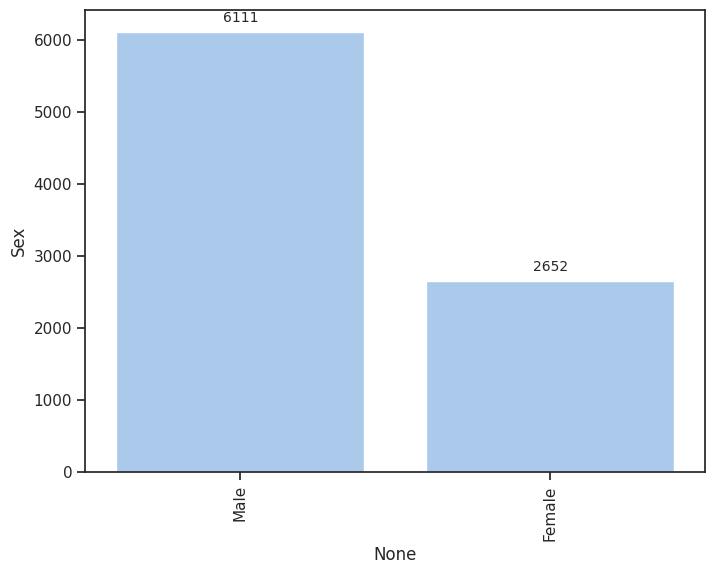

<ipython-input-76-3e9facc7dd5c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


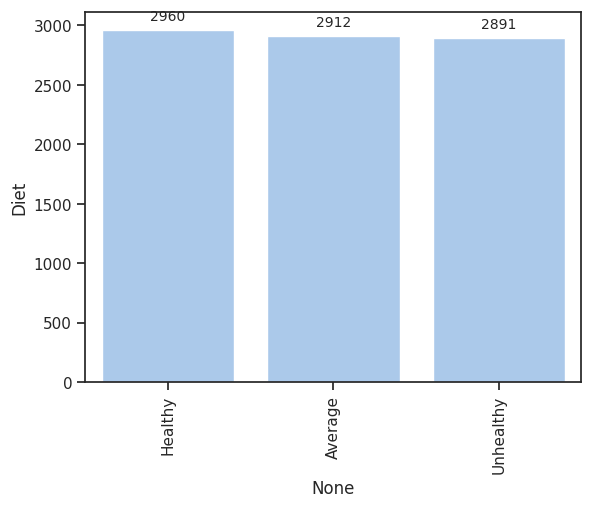

<ipython-input-76-3e9facc7dd5c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


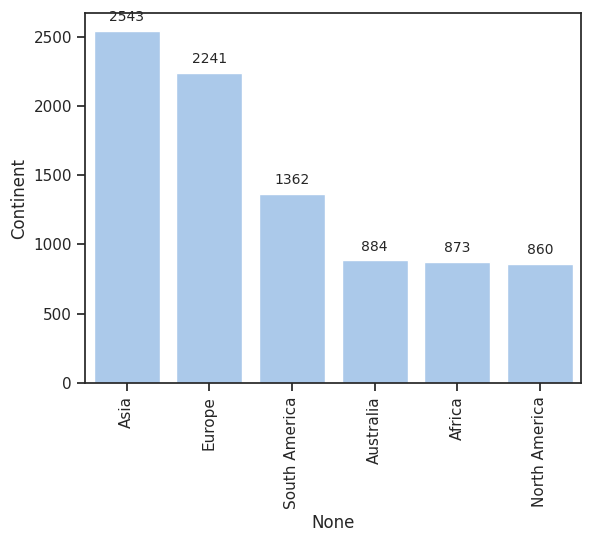

<ipython-input-76-3e9facc7dd5c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


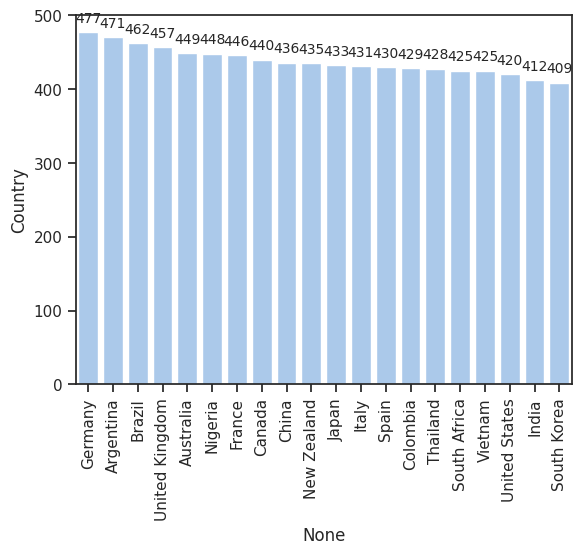

<ipython-input-76-3e9facc7dd5c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


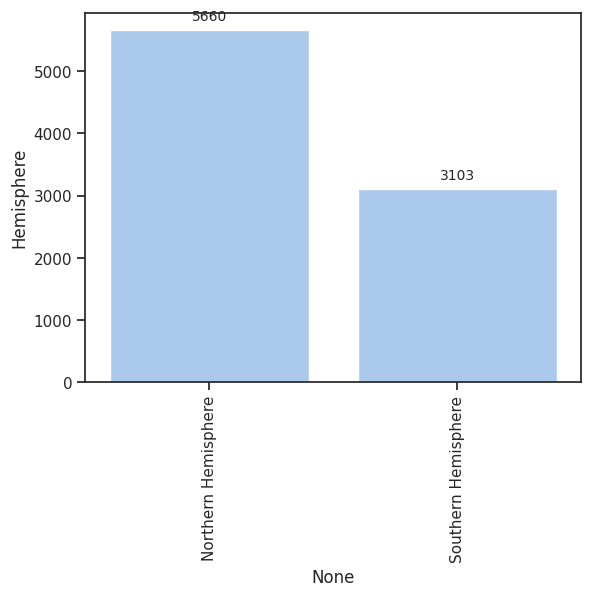

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the figsize as per your preference

for i in ctg_data.columns:
    ctg_num = ctg_data[i].value_counts()
    chart = sns.barplot(x=ctg_num.index, y=ctg_num)
    for p in chart.patches:
        chart.annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points',
                       fontsize=10)

    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()


### Correlation between Variables using HeatMap

<Axes: >

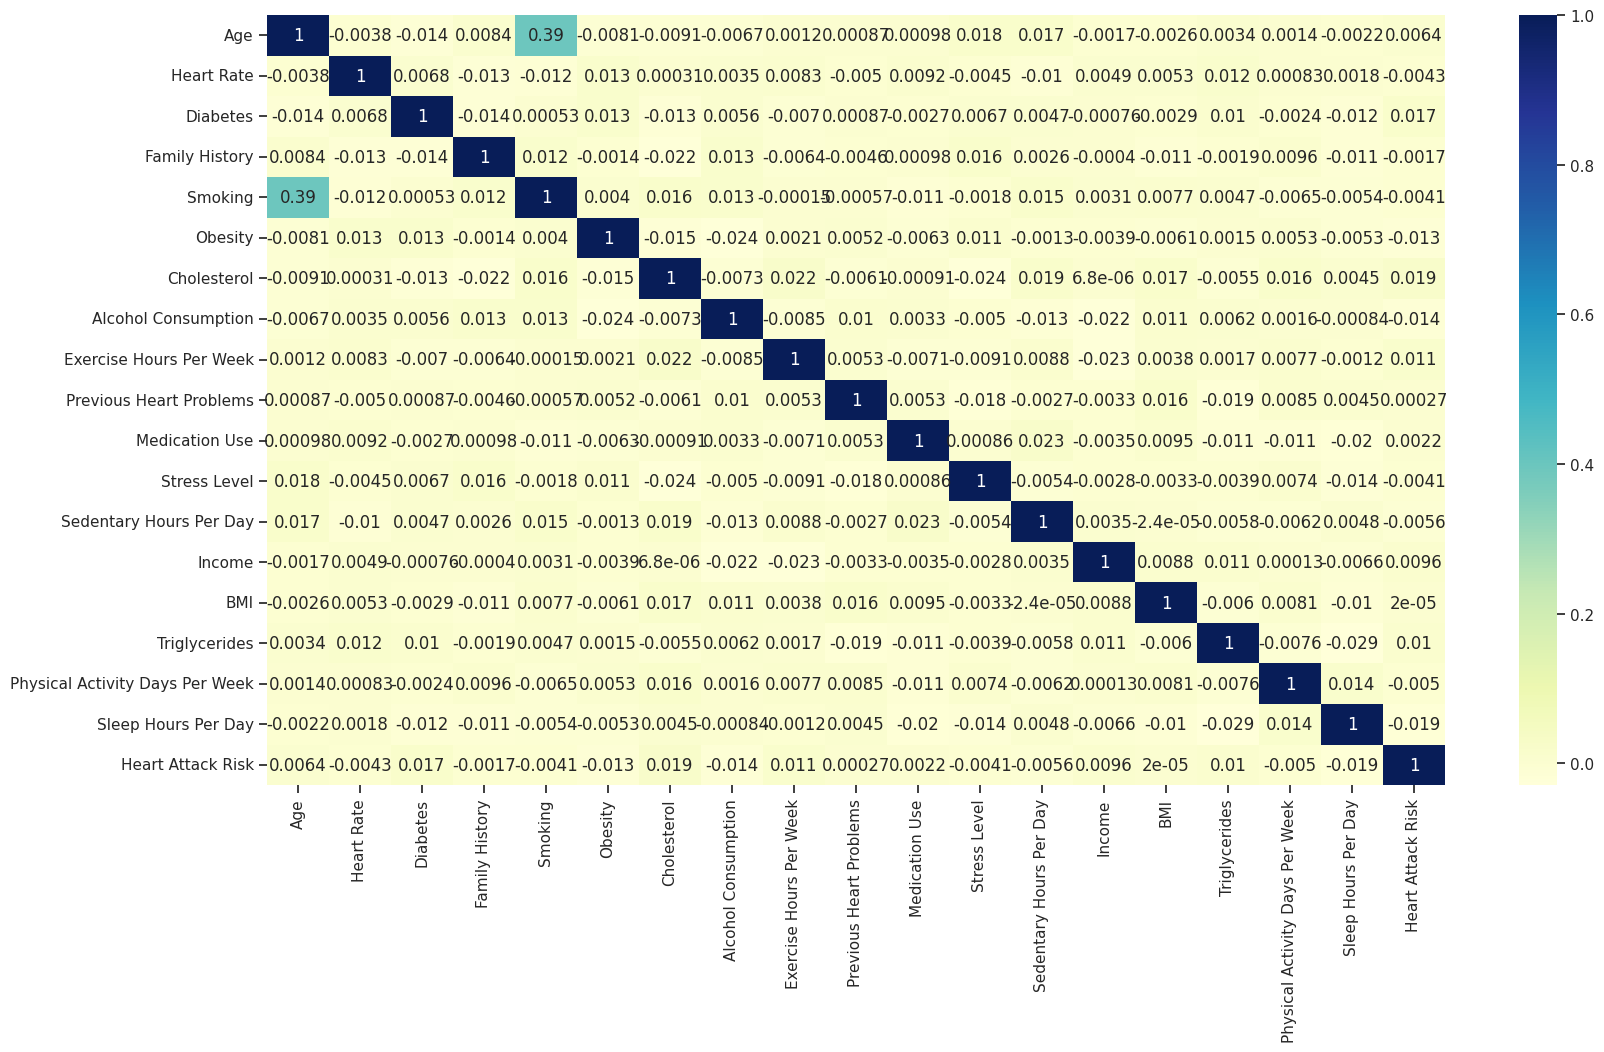

In [ ]:
plt.figure(figsize = (19,10))
sns.heatmap(data[['Age','Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
      'Cholesterol','Alcohol Consumption', 'Exercise Hours Per Week',
     'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day','Heart Attack Risk']].corr(), cmap="YlGnBu",
            annot=True)

Key Findings

*   Heart Attack risk has highest correlation with Diabetes, Cholestrol and Exercise Hours Per Week
*   Heart attack Risk is not much dependent on Sedentary Hours Per Day
*   Alcohol Consumption has no stronger link with Heart Attack Risk
*   Smoking is not a major cause of Heart Attack




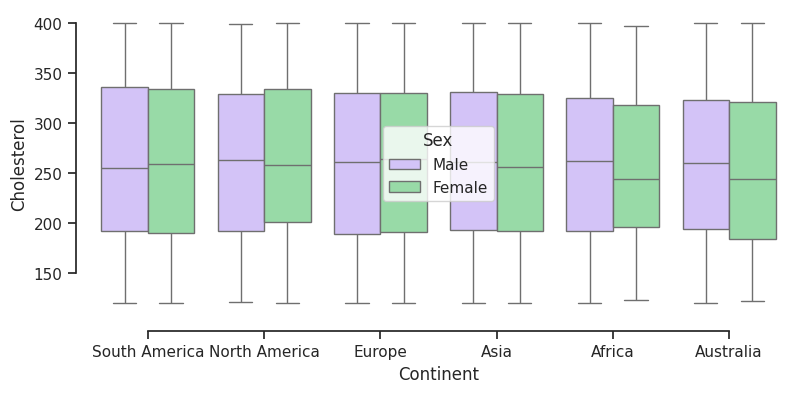

In [ ]:
plt.figure(figsize= (9,4))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Continent", y='Cholesterol', hue="Sex",
             palette=["m", "g"],
            data=data)
sns.despine(offset=10, trim=True) #hue="smoker",

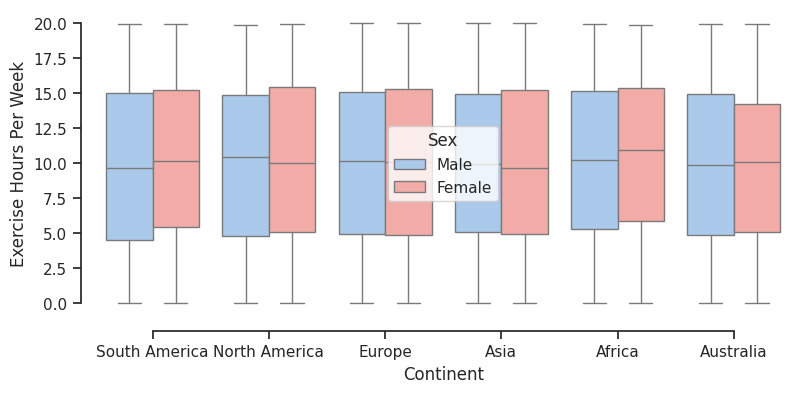

In [ ]:
plt.figure(figsize= (9,4))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Continent", y='Exercise Hours Per Week',  hue="Sex",
             palette=["b", "r"],
            data=data)
sns.despine(offset=10, trim=True) #hue="smoker",

In [ ]:
data.groupby('Country')[['BMI']].mean().sort_values(by = "BMI")
#val.sort_values(by = "BMI")

,BMI
Country,
Japan,28.291157
France,28.555747
Vietnam,28.668896
Spain,28.712143
Colombia,28.714773
New Zealand,28.766462
Argentina,28.794898
Thailand,28.819812
China,28.861312


### Feature Engineering

In [ ]:
# Setting column 'Blood Pressure'
# Splitting Between Diastolic and Systolic Blood Pressure

data['BP_Systolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0])
data['BP_Diastolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1])

In [ ]:
#Ordinal Encoding for diet: 1:healthy, 2:average, 3:unhealthy
#using Map Function
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
data['Diet'] = data['Diet'].map(ordinal_map)

In [ ]:
#One_hot encoding for 'Sex(Gender)'
data = pd.get_dummies(data, columns = ['Sex'])

In [ ]:
data.dtypes

Patient ID                          object
Age                                  int64
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere 

In [ ]:
#Converting 'Object' and 'Boolean' Datatype into int
cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
data[cat_columns] = data[cat_columns].astype(int)

In [ ]:
data.dtypes

Patient ID                          object
Age                                  int64
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere 

### Model Building

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score

In [ ]:
X = data[['Age', 'Cholesterol', 'Heart Rate',
        'Diabetes', 'Family History', 'Smoking', 'Obesity',
        'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
        'Previous Heart Problems', 'Medication Use', 'Stress Level',
        'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
        'Physical Activity Days Per Week', 'Sleep Hours Per Day',
         'BP_Systolic', 'BP_Diastolic','Sex_Female',
         'Sex_Male']]

y=data['Heart Attack Risk'].values

In [ ]:
X.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,BP_Systolic,BP_Diastolic,Sex_Female,Sex_Male
0,67,208,72,0,0,1,0,0,4.168189,1,...,6.615001,261404,31.251233,286,0,6,158,88,0,1
1,21,389,98,1,1,1,1,1,1.813242,0,...,4.963459,285768,27.194973,235,1,7,165,93,0,1
2,21,324,72,1,0,0,0,0,2.078353,2,...,9.463426,235282,28.176571,587,4,4,174,99,1,0
3,84,383,73,1,1,1,0,1,9.828130,1,...,7.648981,125640,36.464704,378,3,4,163,100,0,1
4,66,318,93,1,1,1,1,0,5.804299,0,...,1.514821,160555,21.809144,231,1,5,91,88,0,1


In [ ]:
print(y[1:10])

[0 0 0 0 1 1 1 0 0]


In [ ]:
#Splitting Data
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y, test_size=0.2 , random_state = 0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [ ]:
#Applying and Checking Accuracy and Precision of different Classification Models
models = {'Logistic_Regression':LogisticRegression(),
          'Random_Forest':RandomForestClassifier(),
         'XGBoost':xgb.XGBClassifier(),
          'SVM':SVC(kernel = 'rbf'),
          'KNN':KNeighborsClassifier(n_neighbors = 10),
          'Naive_Bayes':GaussianNB()}

In [ ]:
for i in models:
    obj = models[i]
    obj.fit(train_X, train_y)
    obj_pred = obj.predict(test_X)
    accuracy = accuracy_score(test_y,obj_pred)
    precision = precision_score(test_y,obj_pred,zero_division=1)
    print('Accuracy of '+i+': ',accuracy)
    print('Precision of '+i+': ',precision)

Accuracy of Logistic_Regression:  0.6354820308043354
Precision of Logistic_Regression:  1.0
Accuracy of Random_Forest:  0.6337706788362807
Precision of Random_Forest:  0.4666666666666667
Accuracy of XGBoost:  0.5852823730747291
Precision of XGBoost:  0.36503067484662577
Accuracy of SVM:  0.6354820308043354
Precision of SVM:  0.5
Accuracy of KNN:  0.6023958927552767
Precision of KNN:  0.3333333333333333
Accuracy of Naive_Bayes:  0.6354820308043354
Precision of Naive_Bayes:  1.0


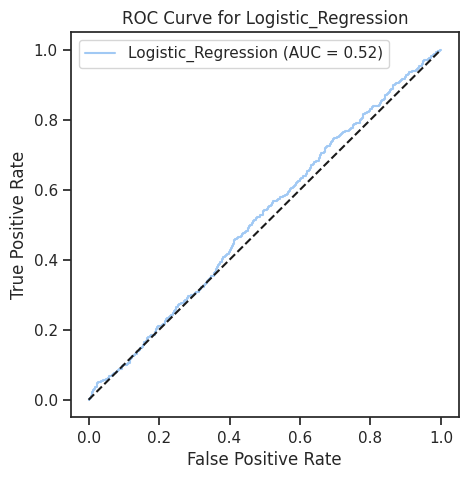

Confusion Matrix for Logistic_Regression:
[[1114    0]
 [ 639    0]]



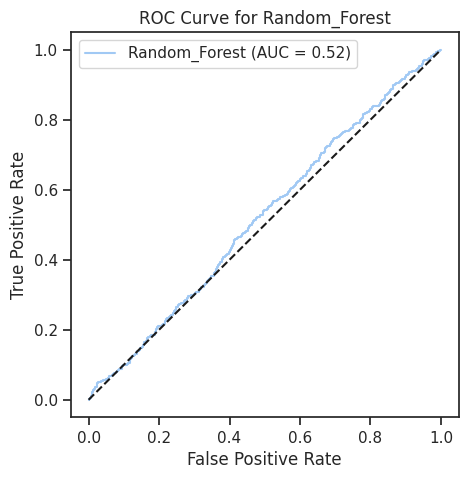

Confusion Matrix for Random_Forest:
[[1095   19]
 [ 623   16]]



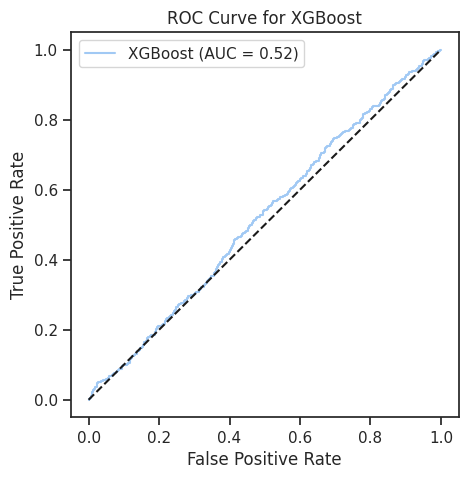

Confusion Matrix for XGBoost:
[[907 207]
 [520 119]]



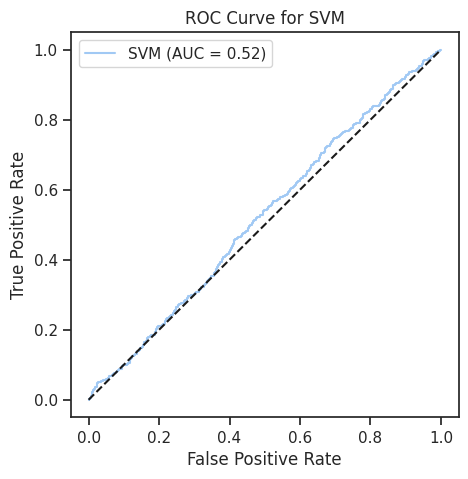

Confusion Matrix for SVM:
[[1113    1]
 [ 638    1]]



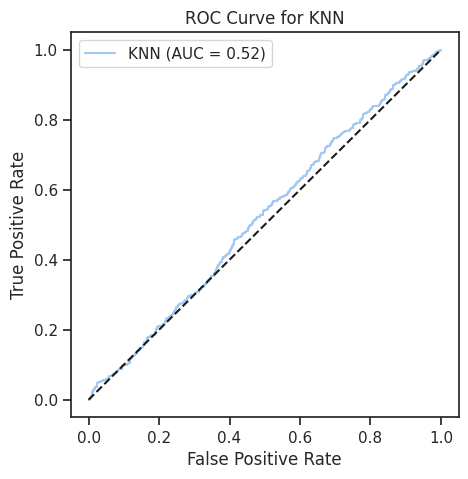

Confusion Matrix for KNN:
[[998 116]
 [581  58]]



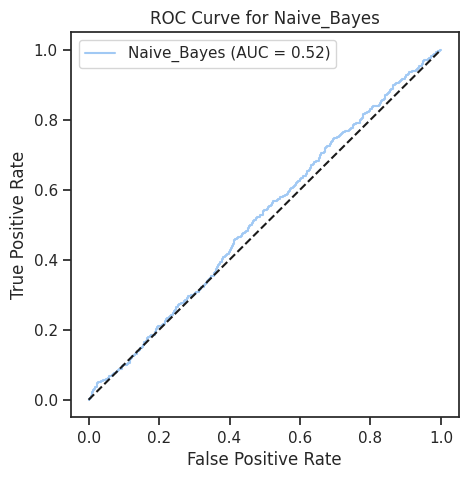

Confusion Matrix for Naive_Bayes:
[[1114    0]
 [ 639    0]]



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

models = {'Logistic_Regression': LogisticRegression(),
          'Random_Forest': RandomForestClassifier(),
          'XGBoost': xgb.XGBClassifier(),
          'SVM': SVC(kernel='rbf'),
          'KNN': KNeighborsClassifier(n_neighbors=10),
          'Naive_Bayes': GaussianNB()}

for i in models:
    obj = models[i]
    obj.fit(train_X, train_y)
    obj_pred = obj.predict(test_X)


    # ROC Curve
    fpr, tpr, thresholds = roc_curve(test_y, obj_prob)
    roc_auc = roc_auc_score(test_y, obj_prob)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'{i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {i}')
    plt.legend()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(test_y, obj_pred)
    print(f'Confusion Matrix for {i}:')
    print(cm)
    print()